In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from tqdm import tqdm
import dissolution_simulation as diss
import dissolution_experiment as dise

import pandas as pd
import numpy as np
import glob, os

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parametry układu eksperymentalnego
$W = 33 \, \rm{mm}$, $L = 38 \, \rm{mm}$, $H = 0.5 \, \rm{mm}$, $D = 10^{-5} \, \rm{cm^2/s}$, $k = 4.67 \cdot 10^{-4} \, \rm{cm/s}$

In [2]:
# loads calculated simulation parameters
df = pd.read_csv("btime.csv", index_col = 0)

# directory of the simulations 
dirname = "/home/fdutka/mysz8_porous/"

In [3]:
df.round(2)

,ht,h0,cv,Pe,Da,hmax,hmax_sim,cv_sim,W,dt,cv_sim2,cv_sim2_perc,NX,dx,Pe_sim,Da_sim,dx_sim,btime,btime_h
btime1,100.0,110.0,0.05,8.42,0.06,600.0,5.45,0.05,33,0.1,0.05,1.00,256,1.17,8.42,0.06,1.17,417,109.72
btime2,70.0,80.0,0.06,8.42,0.04,570.0,7.12,0.07,33,0.1,0.06,1.00,256,1.61,8.42,0.04,1.61,465,88.98
btime3,50.0,60.0,0.08,8.42,0.03,550.0,9.17,0.10,33,0.1,0.08,1.00,256,2.15,8.42,0.03,2.15,515,73.91
btime4,30.0,40.0,0.12,8.42,0.02,530.0,13.25,0.15,33,0.1,0.12,1.00,256,3.22,8.42,0.02,3.22,616,58.94
btime5,20.0,30.0,0.17,8.42,0.02,520.0,17.33,0.20,33,0.1,0.17,1.00,256,4.30,8.42,0.02,4.30,721,51.74
btime6,10.0,20.0,0.25,8.42,0.01,510.0,25.50,0.29,33,0.1,0.25,0.99,256,6.45,8.42,0.01,6.44,950,45.45
btime7,0.0,10.0,0.50,8.42,0.01,500.0,50.00,0.59,33,0.1,0.49,0.98,256,12.89,8.42,0.01,12.89,1769,42.32
btime8,150.0,160.0,0.03,8.42,0.09,650.0,4.06,0.04,33,0.1,0.03,1.00,256,0.81,8.42,0.09,0.81,373,142.76
btime9,200.0,210.0,0.02,8.42,0.12,700.0,3.33,0.03,33,0.1,0.02,1.00,256,0.61,8.42,0.12,0.61,346,173.81


In [27]:
i = 8
row = df.iloc[i]
sim = diss.phimage(dirname+row.name) 
tsteps = sim.time_steps()
tsteps = tsteps[tsteps <= row.btime]

<IPython.core.display.Javascript object>


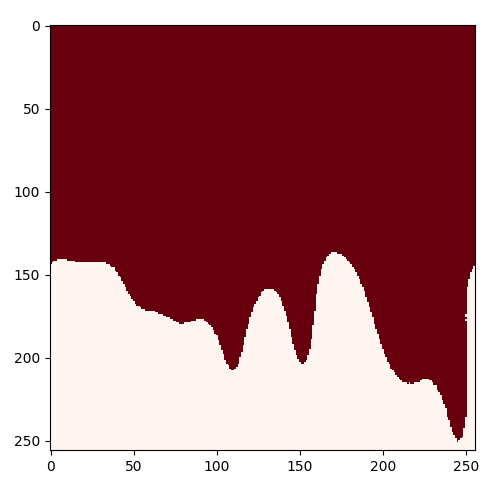

In [83]:
ts = -10

fig1 = sim.im(tsteps[ts])
fig1

In [120]:
row.dx_sim

0.6138

In [121]:
row.dx

0.6138392857142857

In [122]:
256*row.dx_sim*row.h0/1000


32.997887999999996

In [165]:
i = -1
row = df.iloc[i]
sim = diss.phimage(dirname+row.name) 
tsteps = sim.time_steps()
tsteps = tsteps[tsteps <= row.btime]

In [166]:
x_tip_root = []
tsh = 0.95
for ts in tqdm(tsteps):
    t_exp = sim.timeh(ts, row.h0) # [h]
    
    phi = sim.phi2('phi.'+str(ts).zfill(4))/sim.hmax()
    x_root_sim = (phi == 1).all(axis = 1).sum()-1
    x_root_exp = x_root_sim*row.dx_sim*row.h0/1000 # [mm]
    
    x_tip_sim = (phi >= tsh).any(axis =1).sum()-1
    x_tip_exp = x_tip_sim*row.dx_sim*row.h0/1000 # [mm]
    x_tip_root.append([t_exp, x_root_exp, x_tip_exp])
x_tip_root = np.array(x_tip_root)

100%|██████████| 347/347 [00:16<00:00, 20.47it/s]


<IPython.core.display.Javascript object>


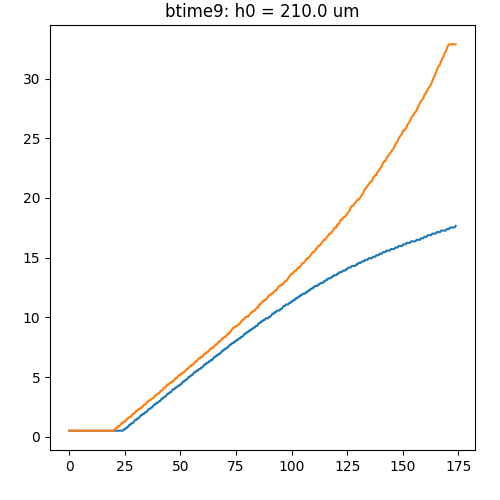

In [167]:
fig1 = plt.figure(figsize = (5,5))
fig1.patch.set_facecolor('white')
fig1.patch.set_alpha(1)
ax1 = fig1.add_axes([.1,.1,.85,.85])
ax1.plot(x_tip_root.T[0], x_tip_root.T[1])
ax1.plot(x_tip_root.T[0],x_tip_root.T[2])
ax1.set_title(f"{row.name}: h0 = {row.h0} um")
fig1.show()

In [135]:
x_tip_root.T[0]

array([  0.        ,   0.50233325,   1.0046665 ,   1.50699975,
         2.009333  ,   2.51166625,   3.0139995 ,   3.51633275,
         4.018666  ,   4.52099925,   5.0233325 ,   5.52566575,
         6.027999  ,   6.53033225,   7.0326655 ,   7.53499875,
         8.037332  ,   8.53966525,   9.0419985 ,   9.54433176,
        10.04666501,  10.54899826,  11.05133151,  11.55366476,
        12.05599801,  12.55833126,  13.06066451,  13.56299776,
        14.06533101,  14.56766426,  15.06999751,  15.57233076,
        16.07466401,  16.57699726,  17.07933051,  17.58166376,
        18.08399701,  18.58633026,  19.08866351,  19.59099676,
        20.09333001,  20.59566326,  21.09799651,  21.60032976,
        22.10266301,  22.60499626,  23.10732951,  23.60966276,
        24.11199601,  24.61432926,  25.11666251,  25.61899576,
        26.12132901,  26.62366226,  27.12599551,  27.62832876,
        28.13066201,  28.63299527,  29.13532852,  29.63766177,
        30.13999502,  30.64232827,  31.14466152,  31.64

<IPython.core.display.Javascript object>


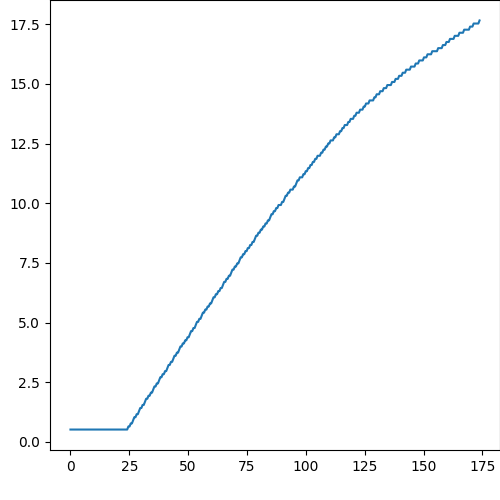

In [130]:
fig1

In [16]:
fig1 = diss.fig_fractal_dim(sim, row.btime, save=True, filename = "btime9_b.png")

100%|██████████| 381/381 [00:23<00:00, 16.27it/s]


In [5]:
folder_names = [f"btime{i}" for i in range(1,len(h0)+1)] 

In [98]:
df_exp = pd.read_csv("BTime_exps_staszeq.csv")

<IPython.core.display.Javascript object>


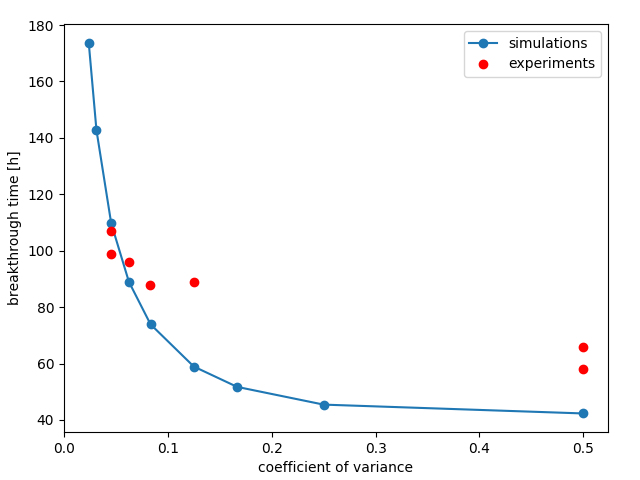

In [99]:
df2 = df.sort_values(by = 'cv')[['cv','btime_h','h0','ht']]

fig2 = plt.figure()
fig2.patch.set_facecolor('white')
fig2.patch.set_alpha(1)

ax = fig2.add_axes([.1,.1,.85,.85])
#ax.plot(df2.cv, df2.btime*df2.Da*df2.dt, '-o')
ax.plot(df2.cv, df2.btime_h, '-o', label = "simulations")
ax.plot(df_exp["CV"], df_exp["BT [h]"], 'ro', label = "experiments")
ax.axes.set_xlabel('coefficient of variance')
ax.axes.set_ylabel('breakthrough time [h]')
ax.legend()
#fig2.savefig('btime_sim_vs_exp.png', dpi = 300)
plt.ion()
fig2.show()

In [63]:
fig2.savefig('halo.png', dpi = 300)

In [14]:
list(np.log(df2.cv))
#list(np.log(df2.btime*df2.Da*df2.dt))

[-3.7376496184833656,
 -3.4657359027997265,
 -3.0911424583586493,
 -2.772588722239781,
 -2.4849466505880216,
 -2.0794415416798357,
 -1.7917394694280522,
 -1.3862943611198906,
 -0.6931471805599453]

In [42]:
def finish_check(name):
    """
    checks wether actual timestep of simulation exceeds breakthrough time
    """
    b = phimage(name)
    l1 = b.time_steps()
    print(f"{name}: last = {l1[-1]}, btime = {b.BTime()}")

In [31]:
sim = df.iloc[0]
b1 = phimage(sim.name)

In [101]:
# calculation of mean values of height for each timetstep in simulation before breakthrough
lm1 = []

for i in range(len(df)):
    sim = df.iloc[i]
    b1 = phimage(sim.name)
    t = b1.time_steps()
    t = t[t<sim.btime]
    
    m1 = [b1.phi2('phi.'+str(ti).zfill(4)).mean() for ti in t]
    lm1.append([t,m1])

NameError: name 'phimage' is not defined

<IPython.core.display.Javascript object>


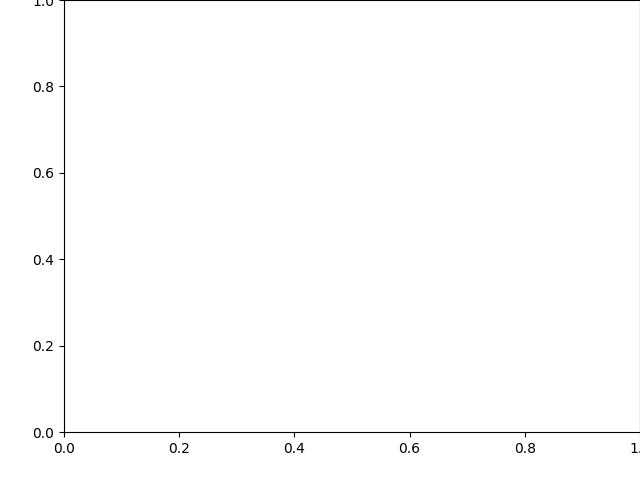

NameError: name 'lm1' is not defined

In [100]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,.9, .9])
for i in range(len(df)):
    sim = df.iloc[i]
    m1 = lm1[i]
    ax.plot(m1[0]*sim.Da*sim['dt'], m1[1], '-', label = f"cv = {np.round(sim.cv,3)}")
ax.axes.set_ylabel('speed of change of mean height')
ax.axes.set_xlabel('simulation time')
ax.legend()
ax.axes.set_title('Constant flowrate Q = 1 ml/h')
fig.tight_layout()

#fig.savefig('Qspeed_mean_h.png', dpi = 300)
fig

In [71]:
# calculation of speed of change of mean value of h
vh = []
for i in range(len(df)):
    tmax = 100
    ntmax = (lm1[i][0]< tmax).astype(int).sum()
    slope, intercept, r_value, p_value, std_err = stats.linregress(lm1[i][0][:ntmax], lm1[i][1][:ntmax])
    print(f"{df.index[i]}:, {slope} \t {intercept}")
    vh.append(slope)
df['vh'] = vh

btime1:, 0.005463371994194263 	 1.0869542640408323
btime2:, 0.005458266184957456 	 1.1194897359474196
btime3:, 0.005453639017326108 	 1.1592860391294182
btime4:, 0.005435971719653991 	 1.2388247292937842
btime5:, 0.005426506635306718 	 1.3183473902617293
btime6:, 0.005327130127498745 	 1.4774388823013307
btime7:, 0.004917606856789623 	 1.954637171360093
btime8:, 0.005460389976804261 	 1.059789580471004
btime9:, 0.005439924248665832 	 1.0455688344023453


In [72]:
df.to_csv('btime2.csv')

In [97]:
vsim = 0.00544

In [100]:
33**2*df.h0/1e3/df.Da

btime1    1962.883655
btime2    1962.883655
btime3    1962.883655
btime4    1962.883655
btime5    1962.883655
btime6    1962.883655
btime7    1962.883655
btime8    1962.883655
btime9    1962.883655
dtype: float64

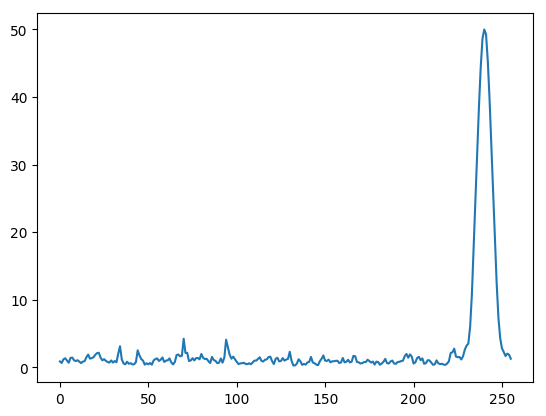

In [101]:
b1 = phimage('btime7')

phi = b1.phi2('phi.1769')

plt.ion()
plt.plot(np.arange(len(phi[-1])), phi[-1])